# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

arquivo = pd.read_csv('previsao_de_renda.csv')

In [5]:
df = pd.DataFrame(arquivo)
df2 = df.select_dtypes(exclude = [object])
df2.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
matriz_correl_df2 = df2.corr()

In [22]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [10]:
matriz_correl_df2

,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


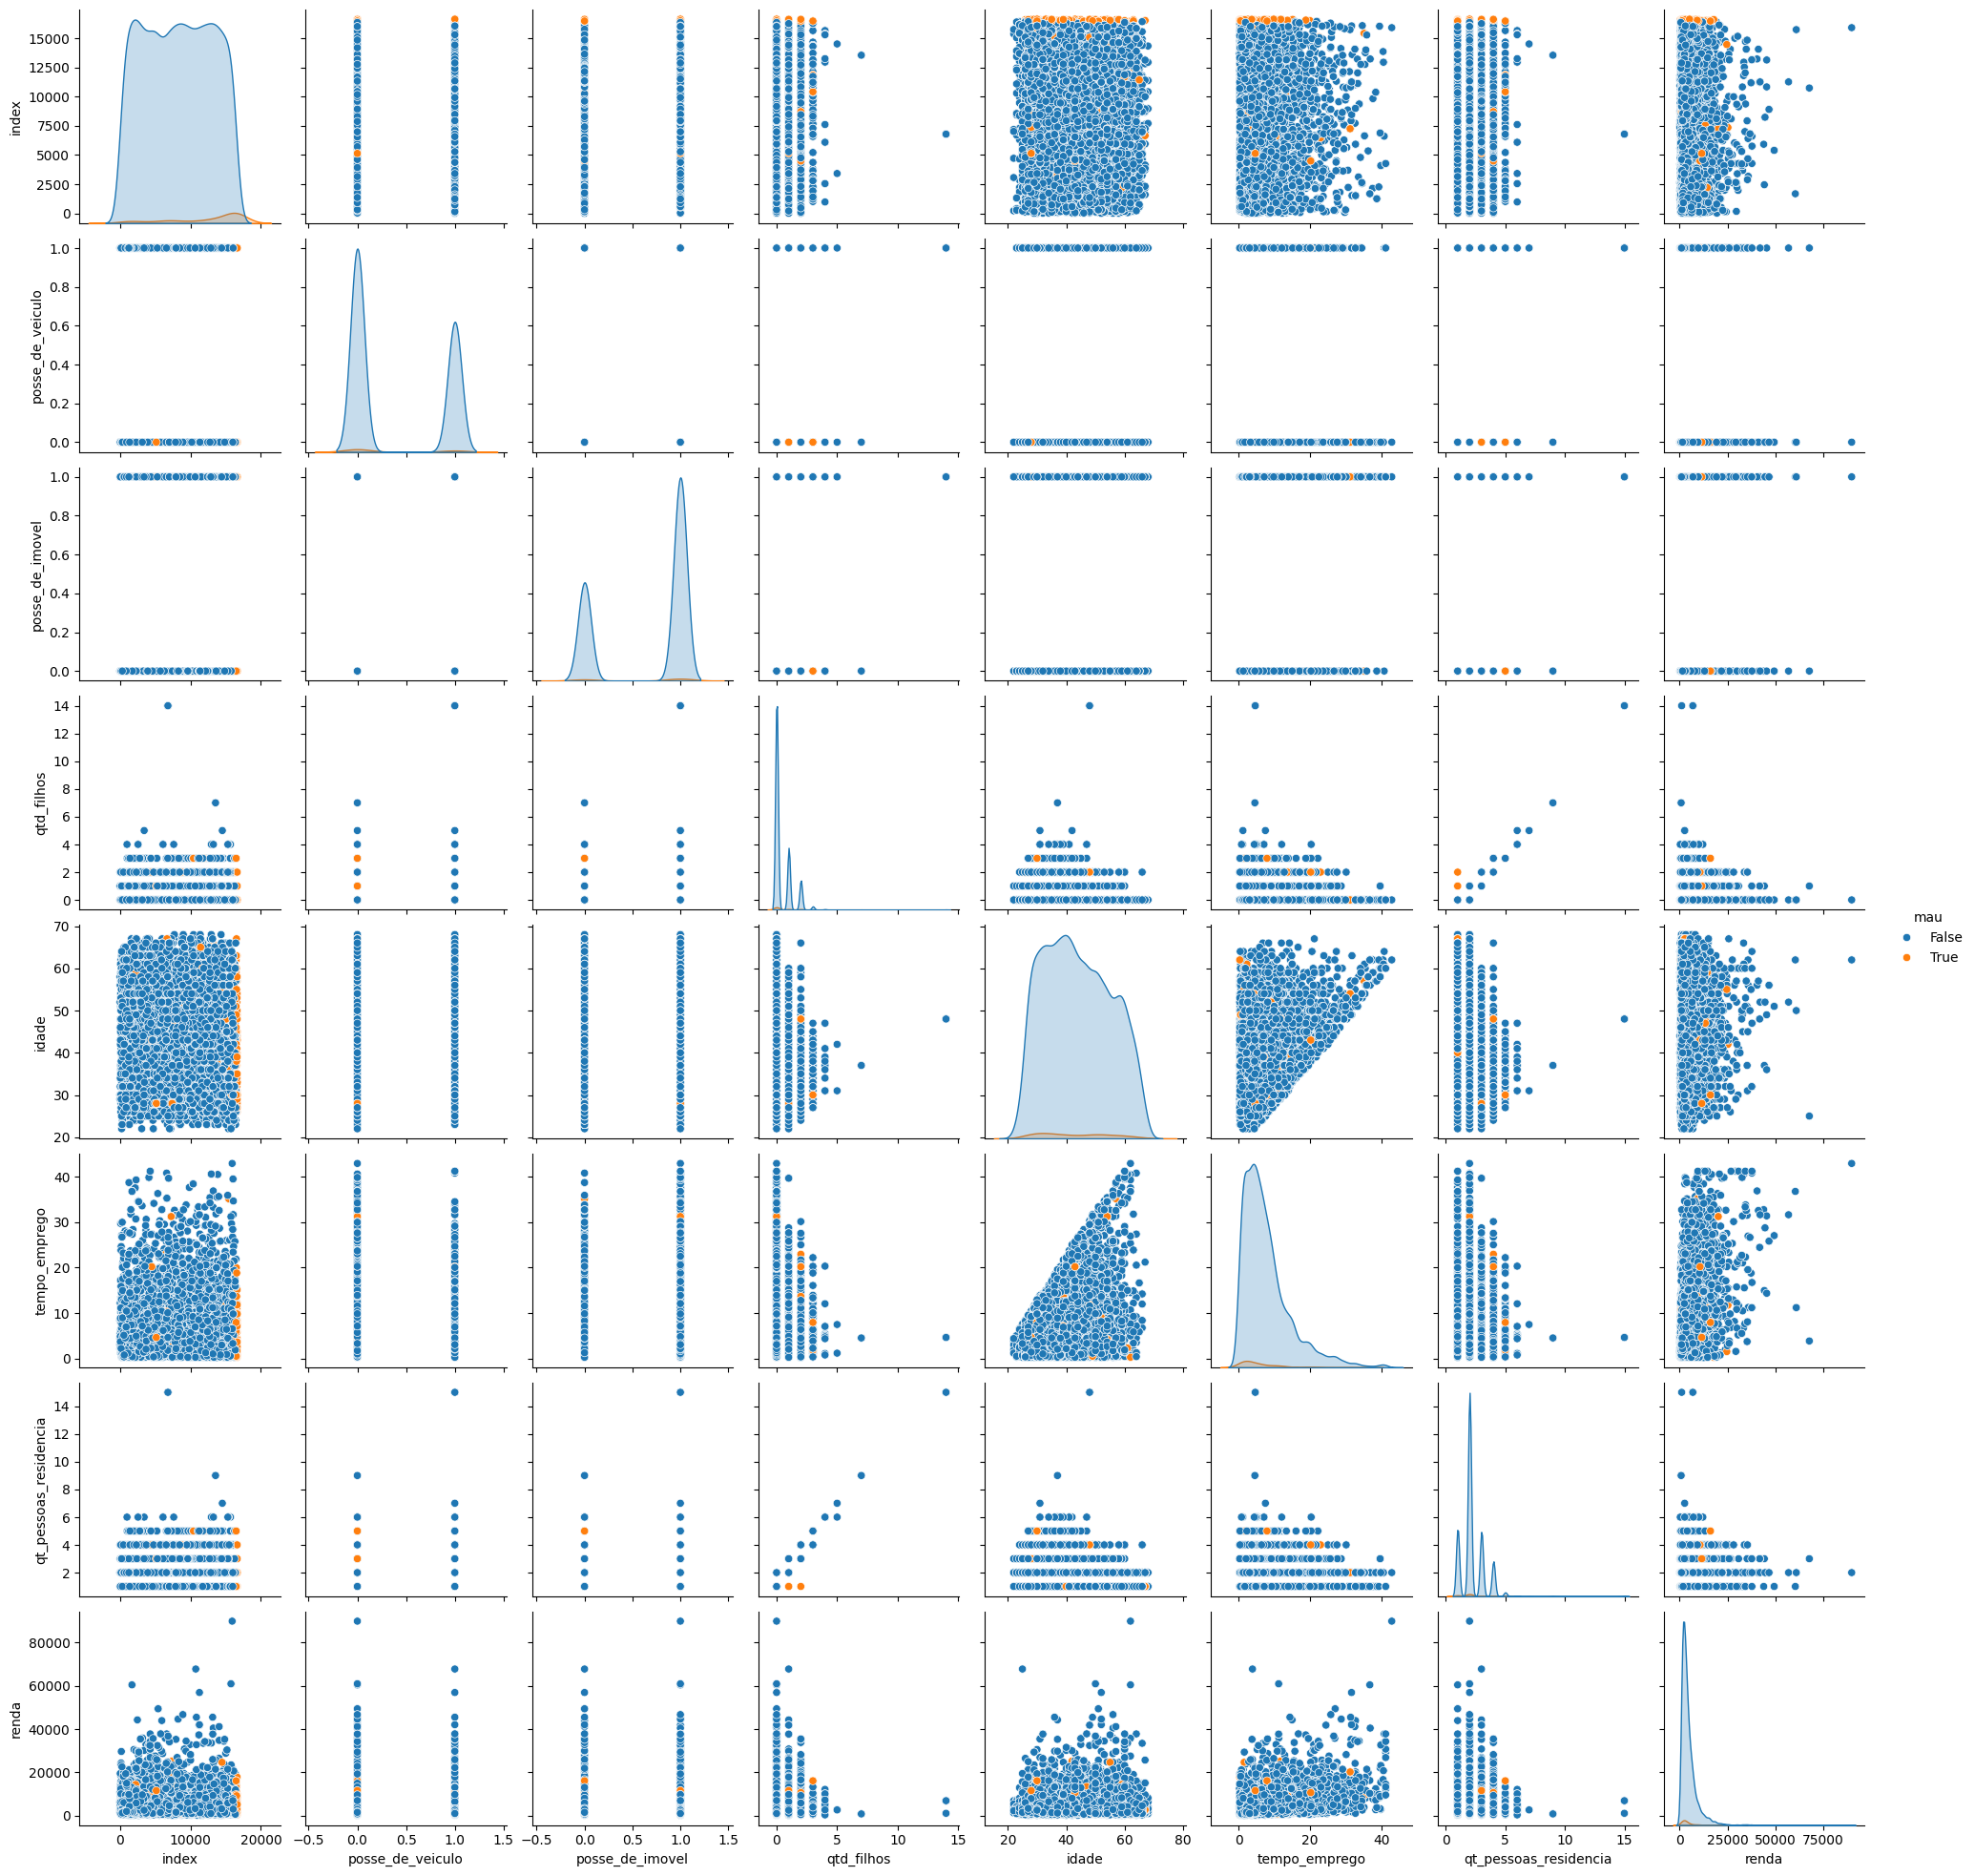

In [29]:
sns.pairplot(df2, hue='mau')

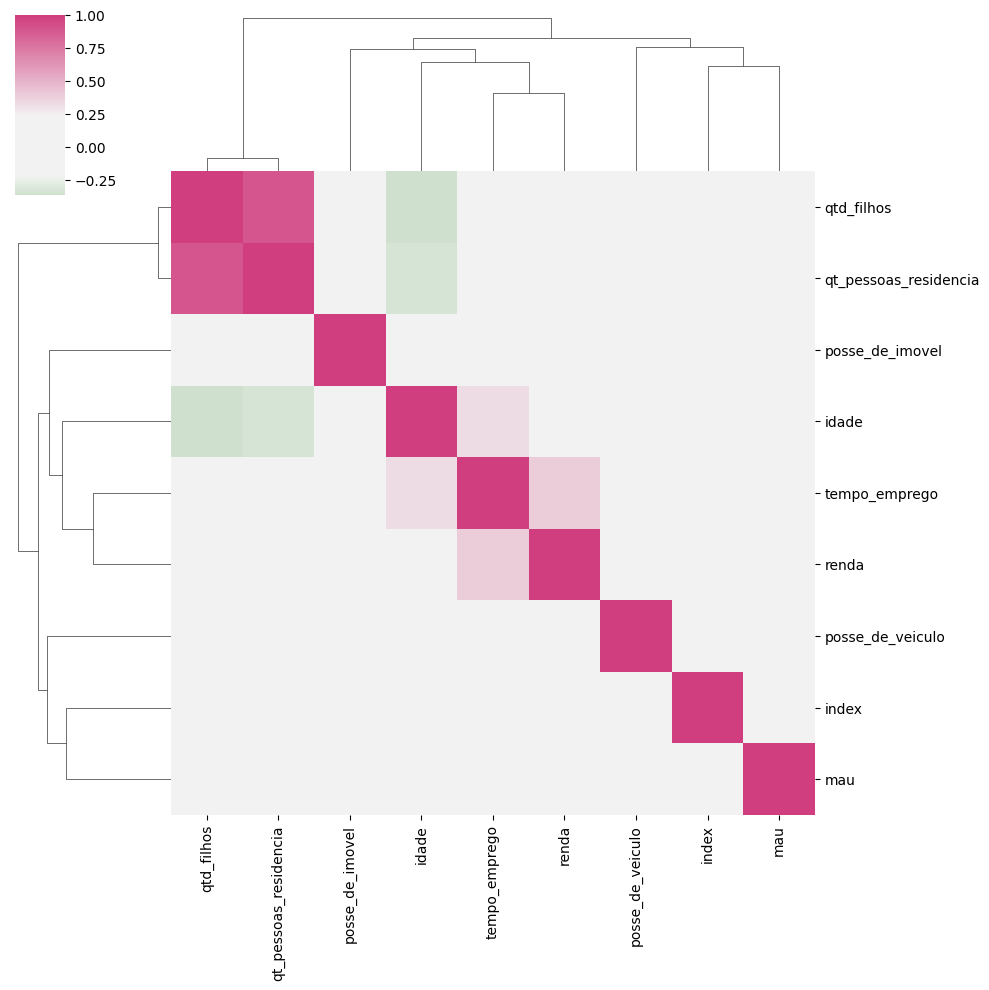

In [12]:
cmap = sns.diverging_palette(h_neg = 125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(df2.corr(), figsize=(10,10), center=0, cmap=cmap)

In [ ]:
#Tem uma pequena corelação entre a renda e o tempo de emprego

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='renda', ylabel='tempo_emprego'>

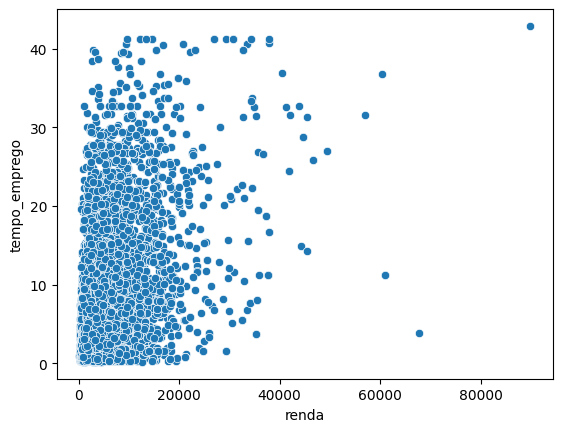

In [14]:
sns.scatterplot(x=df2.renda, y=df2.tempo_emprego, data=df2)

<Axes: xlabel='renda', ylabel='idade'>

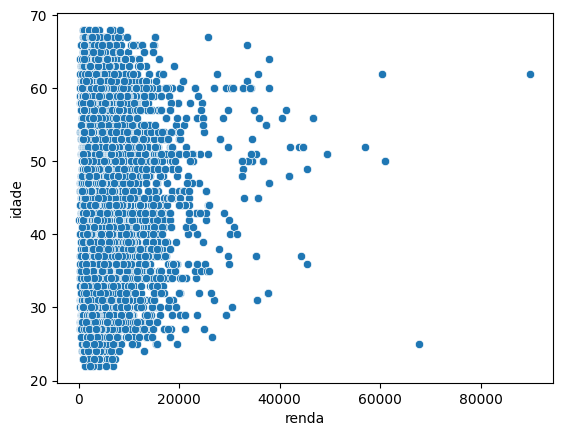

In [16]:
sns.scatterplot(x=df2.renda, y=df2.idade, data=df2)

3) Na su aopinião, há outliers na variável renda?

In [62]:
df2['renda'].value_counts().sort_index(ascending=False)

renda
89918.04    1
67794.54    1
60965.51    2
60475.59    1
56938.90    1
           ..
247.73      1
238.38      2
194.85      1
187.69      1
159.90      1
Name: count, Length: 9759, dtype: int64

In [50]:
df2['renda'].max()

89918.04

In [52]:
df2['renda'].mean()

4624.632946

In [46]:
df2['renda'].median()

3278.26

<Axes: ylabel='renda'>

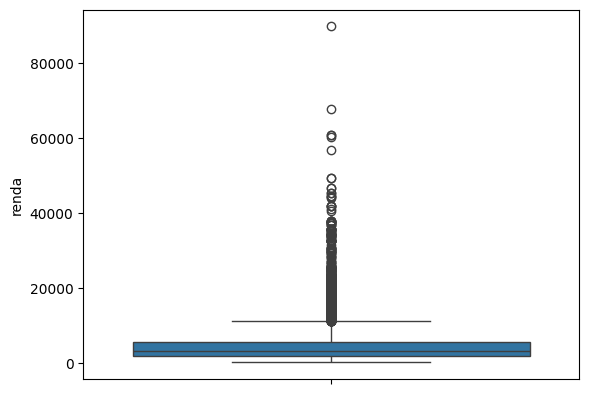

In [26]:
sns.boxplot(data=df2['renda'])

In [ ]:
#Sim, temos outliers na variável renda

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [30]:
renda_log = np.log(df2['renda'])
renda_log

0        8.122442
1        8.715411
2        8.640999
3        8.888300
4        8.298383
           ...   
14995    7.084469
14996    7.831689
14997    7.369506
14998    8.850144
14999    6.901596
Name: renda, Length: 15000, dtype: float64

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

<Axes: xlabel='renda', ylabel='tempo_emprego'>

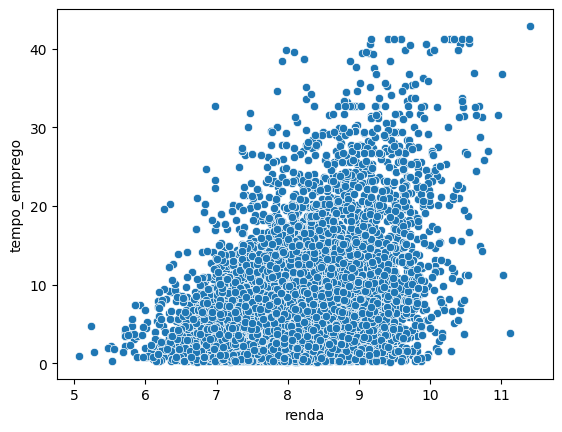

In [32]:
sns.scatterplot(x=renda_log, y=df2.tempo_emprego, data=df2)

<Axes: xlabel='renda', ylabel='idade'>

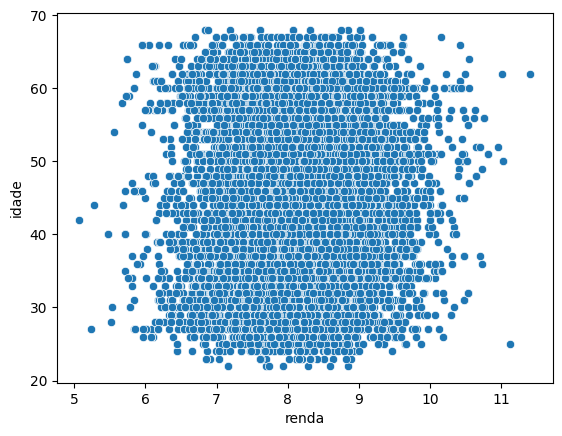

In [42]:
sns.scatterplot(x=renda_log, y=df2.idade, data=df2)

In [34]:
renda_log.value_counts().sort_index(ascending=False)

renda
11.406654    1
11.124237    1
11.018064    2
11.009995    1
10.949734    1
            ..
5.512339     1
5.473866     2
5.272230     1
5.234792     1
5.074549     1
Name: count, Length: 9759, dtype: int64

In [36]:
renda_log.mean()

8.1110474791073

In [38]:
renda_log.max()

11.406653867736932

In [40]:
renda_log.min()

5.074548619839908

A aplicação do log melhorou a análise ao se avaliar a renda com o tempo de emprego ou idade, mostrando que aconteceu uma 
redução do impacto dos outliers